In [43]:
import tensorflow as tf
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Luke_hair_loss_documentation.csv')

In [4]:
df.head()


,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,Y,3.0,None,1
1,2/01/2021,Few,0,Low,0,3,None,Low,Pantene,No,N,1.0,None,1
2,3/01/2021,Medium,3,Low,1,0,None,Low,Pantene,Yes,Y,2.0,None,2
3,4/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,N,3.0,None,3
4,5/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,Y,1.0,None,2


In [5]:
df['dandruff'].replace('None',0,inplace=True)
df['dandruff'].replace('Few',1,inplace=True)
df['dandruff'].replace('Many',2, inplace=True)

df['hair_loss'].replace("Few", 0, inplace=True)
df['hair_loss'].replace("Medium", 0, inplace=True)
df['hair_loss'].replace("Many", 1, inplace=True)
df['hair_loss'].replace("A lot", 1, inplace=True)

df['swimming'].replace('Yes', 1, inplace=True)
df['swimming'].replace('No', 0, inplace=True)

df.replace('Low', 0, inplace=True)
df.replace('Medium', 1, inplace=True)
df.replace('High', 2, inplace=True)
df.replace('Very High', 3, inplace=True)


In [6]:
df.head()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,0,2,0,0,1,None,0,Pantene,0,Y,3.0,0,1
1,2/01/2021,0,0,0,0,3,None,0,Pantene,0,N,1.0,0,1
2,3/01/2021,0,3,0,1,0,None,0,Pantene,1,Y,2.0,0,2
3,4/01/2021,0,2,0,0,1,None,0,Pantene,0,N,3.0,0,3
4,5/01/2021,0,2,0,0,1,None,0,Pantene,0,Y,1.0,0,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    int64  
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    int64  
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      400 non-null    object 
 7   stress_level            400 non-null    int64  
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    int64  
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                400 non-null    int64  
 13  libido                  400 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory 

In [8]:
plot_cols = df.corr().loc['stay_up_late':, 'hair_loss'].abs().sort_values(ascending=False)
plot_cols

<ipython-input-8-97070c86b636>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_cols = df.corr().loc['stay_up_late':, 'hair_loss'].abs().sort_values(ascending=False)


dandruff                  0.808751
stress_level              0.784986
pressure_level            0.779733
hair_grease               0.682490
coffee_consumed           0.671447
brain_working_duration    0.591093
stay_up_late              0.350551
swimming                  0.240211
libido                    0.140884
Name: hair_loss, dtype: float64

In [18]:
X_df= df[['stress_level', 'pressure_level',"dandruff"]]

** Display summary statistics for numerical columns**

In [17]:
df.describe()

,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_grease,dandruff,libido
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,396.000000,400.000000,400.000000
mean,1.910000,0.540000,1.162500,3.970000,0.650000,0.232500,2.565657,0.365000,2.787500
std,1.611954,0.905788,1.978859,4.215272,1.012454,0.422955,1.276162,0.638588,1.822264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,3.000000,1.000000,1.000000,7.000000,1.000000,0.000000,4.000000,1.000000,5.000000
max,8.000000,3.000000,10.000000,18.000000,3.000000,1.000000,5.000000,2.000000,5.000000


**Check for missing values**

In [19]:
df.isnull().sum()

date                      0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               4
dandruff                  0
libido                    0
dtype: int64

In [74]:
#df=df.drop([' Date'],axis = 1)
#df.reset_index(inplace=True)
# Assuming 'date_column' is the name of the date column
#df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
numeric_columns = df.select_dtypes(include=['number']).columns
X = df[numeric_columns].drop('libido', axis=1)  # Exclude the target variable
df.head()






,date,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,2,0,0,1,None,0,Pantene,0,Y,3.0,0,1
1,2/01/2021,0,0,0,3,None,0,Pantene,0,N,1.0,0,1
2,3/01/2021,3,0,1,0,None,0,Pantene,1,Y,2.0,0,2
3,4/01/2021,2,0,0,1,None,0,Pantene,0,N,3.0,0,3
4,5/01/2021,2,0,0,1,None,0,Pantene,0,Y,1.0,0,2


**Visualize the distribution of a numerical variable EDA**

<Figure size 1000x600 with 0 Axes>

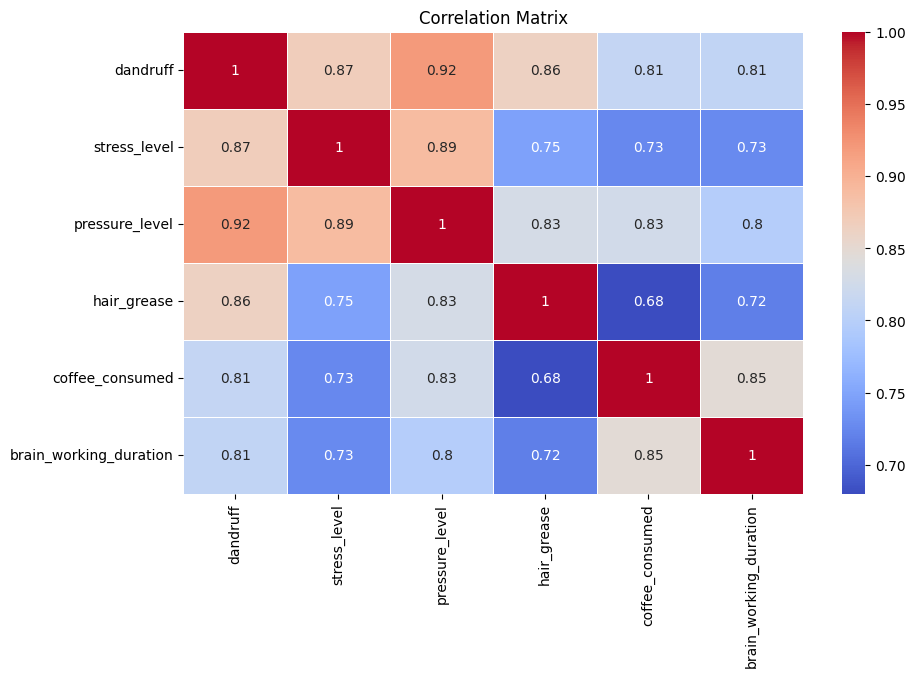

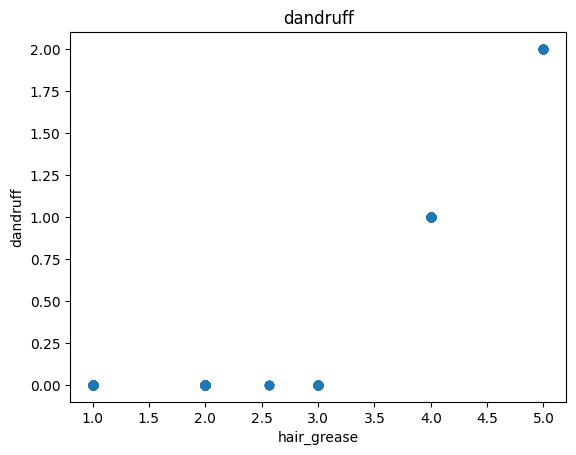

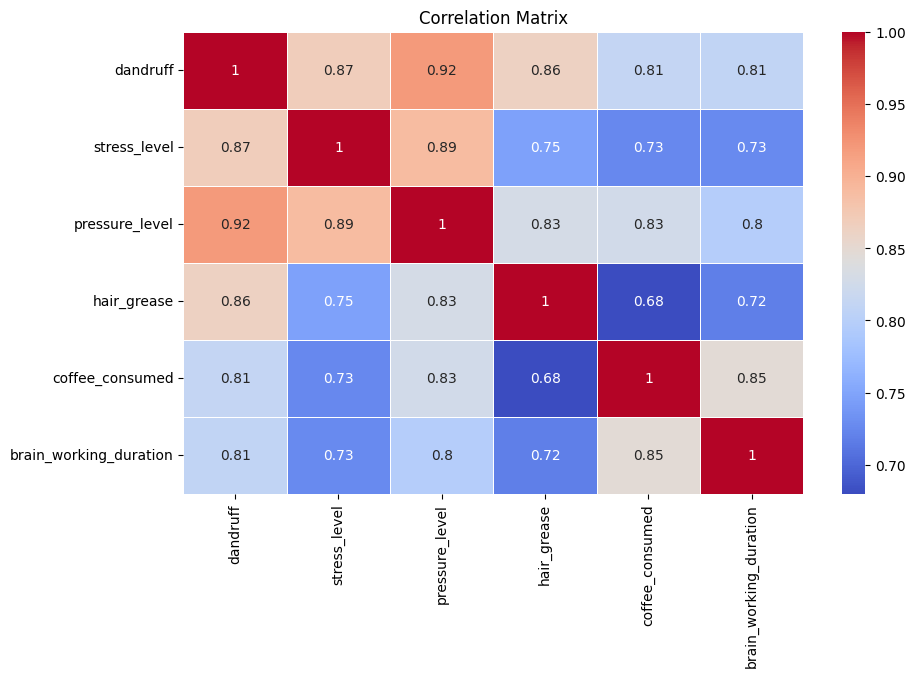

In [125]:
plt.figure(figsize=(10, 6))


# Visualize the distribution of a categorical variable
#plt.figure(figsize=(8, 6))
# sns.countplot(x='stay_up_late', data=df)
# plt.title("Count of People Who Stay Up Late")
# plt.xlabel("Stay Up Late")
# plt.ylabel("Count")
# plt.show()

# Explore correlations between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

#I assumed the columns 'hair_wash' and 'stay_up_late' for the histogram and count plot since the previous column names ('shampoo_brand' and 'coffee_consumed') were not found in the dataset you provided.

#I corrected the labels and titles for each plot.

#Make sure that you replace the column names ('hair_wash', 'stay_up_late', etc.) with the actual column names from your dataset.
#plt.scatter(x, y)
plt.scatter(x='hair_grease', y='dandruff', data=df)
plt.title("dandruff")
plt.xlabel("hair_grease")
plt.ylabel("dandruff")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# # Create a histogram plot with seaborn for a DataFrame column
# plt.figure(figsize=(10, 6))
# sns.histplot(df['coffe_consumed'], bins=20, kde=True)  # Replace 'your_column_name' with the actual column name
# plt.title("Histogram of Shampoo Label")
# plt.xlabel("Shampoo Label")
# plt.ylabel("Hair Washing Frequency")
# plt.show()


# Visualize the distribution of a categorical variable
# plt.figure(figsize=(8, 6))
# sns.countplot(x='stay_up_late	', data=df)
# plt.title("stay up late and coffe")
# plt.xlabel("stay_up_late	")
# plt.ylabel("coffee_consumed")
# plt.show()

# Explore correlations between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()




In this code:

We load the dataset into a DataFrame (df) using pd.read_csv(). You should replace 'your_dataset.csv' with your actual dataset file path or data loading method.

We print basic information about the dataset using df.info().

We calculate and display summary statistics using df.describe().

We check for missing values using df.isnull().sum().

We visualize the distribution of a numerical variable (e.g., age) using a histogram.

We visualize the relationship between two numerical variables (e.g., age vs. hair_loss) using a scatterplot.

We visualize the distribution of a categorical variable (e.g., gender) using a countplot.

We explore correlations between numerical variables using a heatmap.

You can customize and expand this code based on your specific dataset and analysis goals. EDA helps you understand the data's characteristics, patterns, and relationships, which can guide you in building a predictive model for hair loss prediction.




In [10]:
y_data = df['hair_loss'].to_numpy().astype(np.float16)
print(y_data.shape)

df.drop('hair_loss', axis=1, inplace=True)

X_data = X_df.to_numpy().astype(np.float16)

print(X_data.shape)
(400,)
(400, 3)

(400,)
(400, 3)


(400, 3)

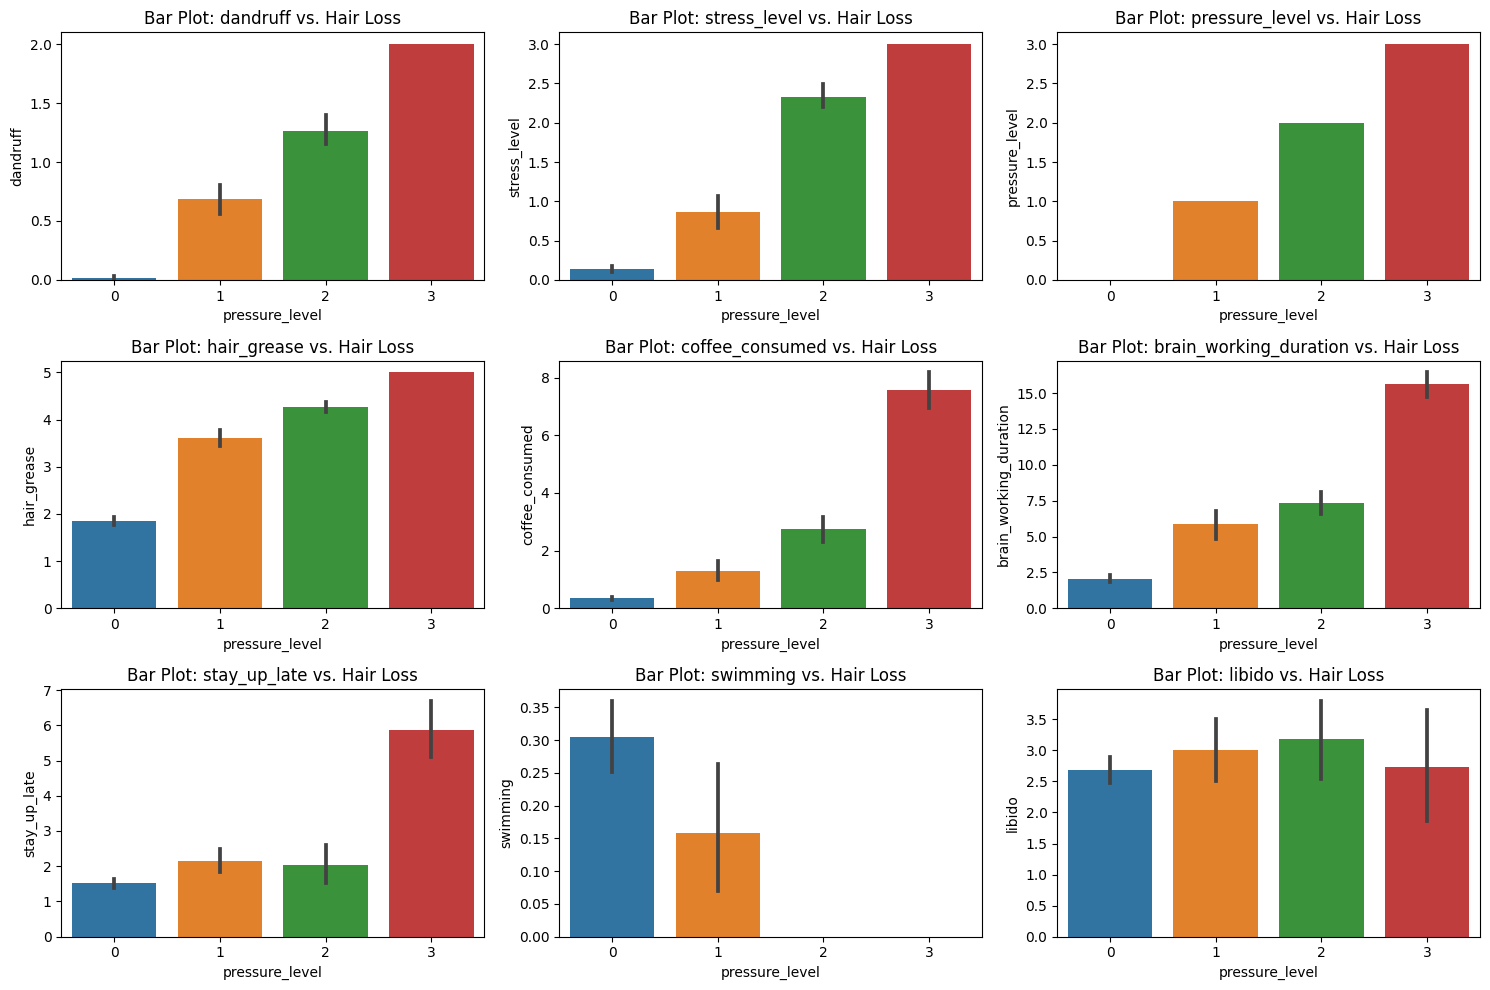

In [35]:
# Set up subplots for individual bar graphs
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
columns_of_interest = ['dandruff', 'stress_level', 'pressure_level', 'hair_grease', 'coffee_consumed',
                        'brain_working_duration', 'stay_up_late', 'swimming', 'libido', 'hair_loss']

# Loop through columns and create bar graphs
for i, column in enumerate(columns_of_interest[:-1]):  # Exclude 'hair_loss'
    row, col = divmod(i, 3)
    sns.barplot(data=df, x='pressure_level', y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Bar Plot: {column} vs. Hair Loss')
    axes[row, col].set_xlabel('pressure_level')
    axes[row, col].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()
#This code will generate individual bar graphs for each of the columns in columns_of_interest (excluding 'hair_loss') against the 'hair_loss' target variable. Each subplot in the grid represents one of these comparisons. You can adjust the figure size and layout as needed to fit your preferences.







<ipython-input-36-88d6b65bb6b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


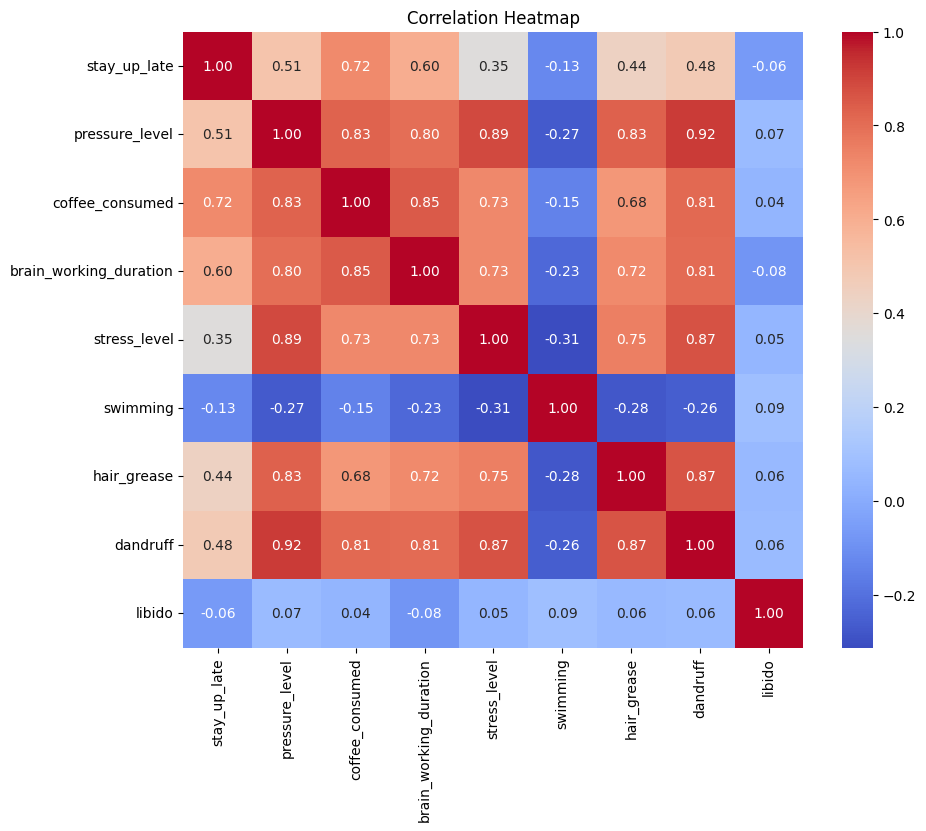

In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

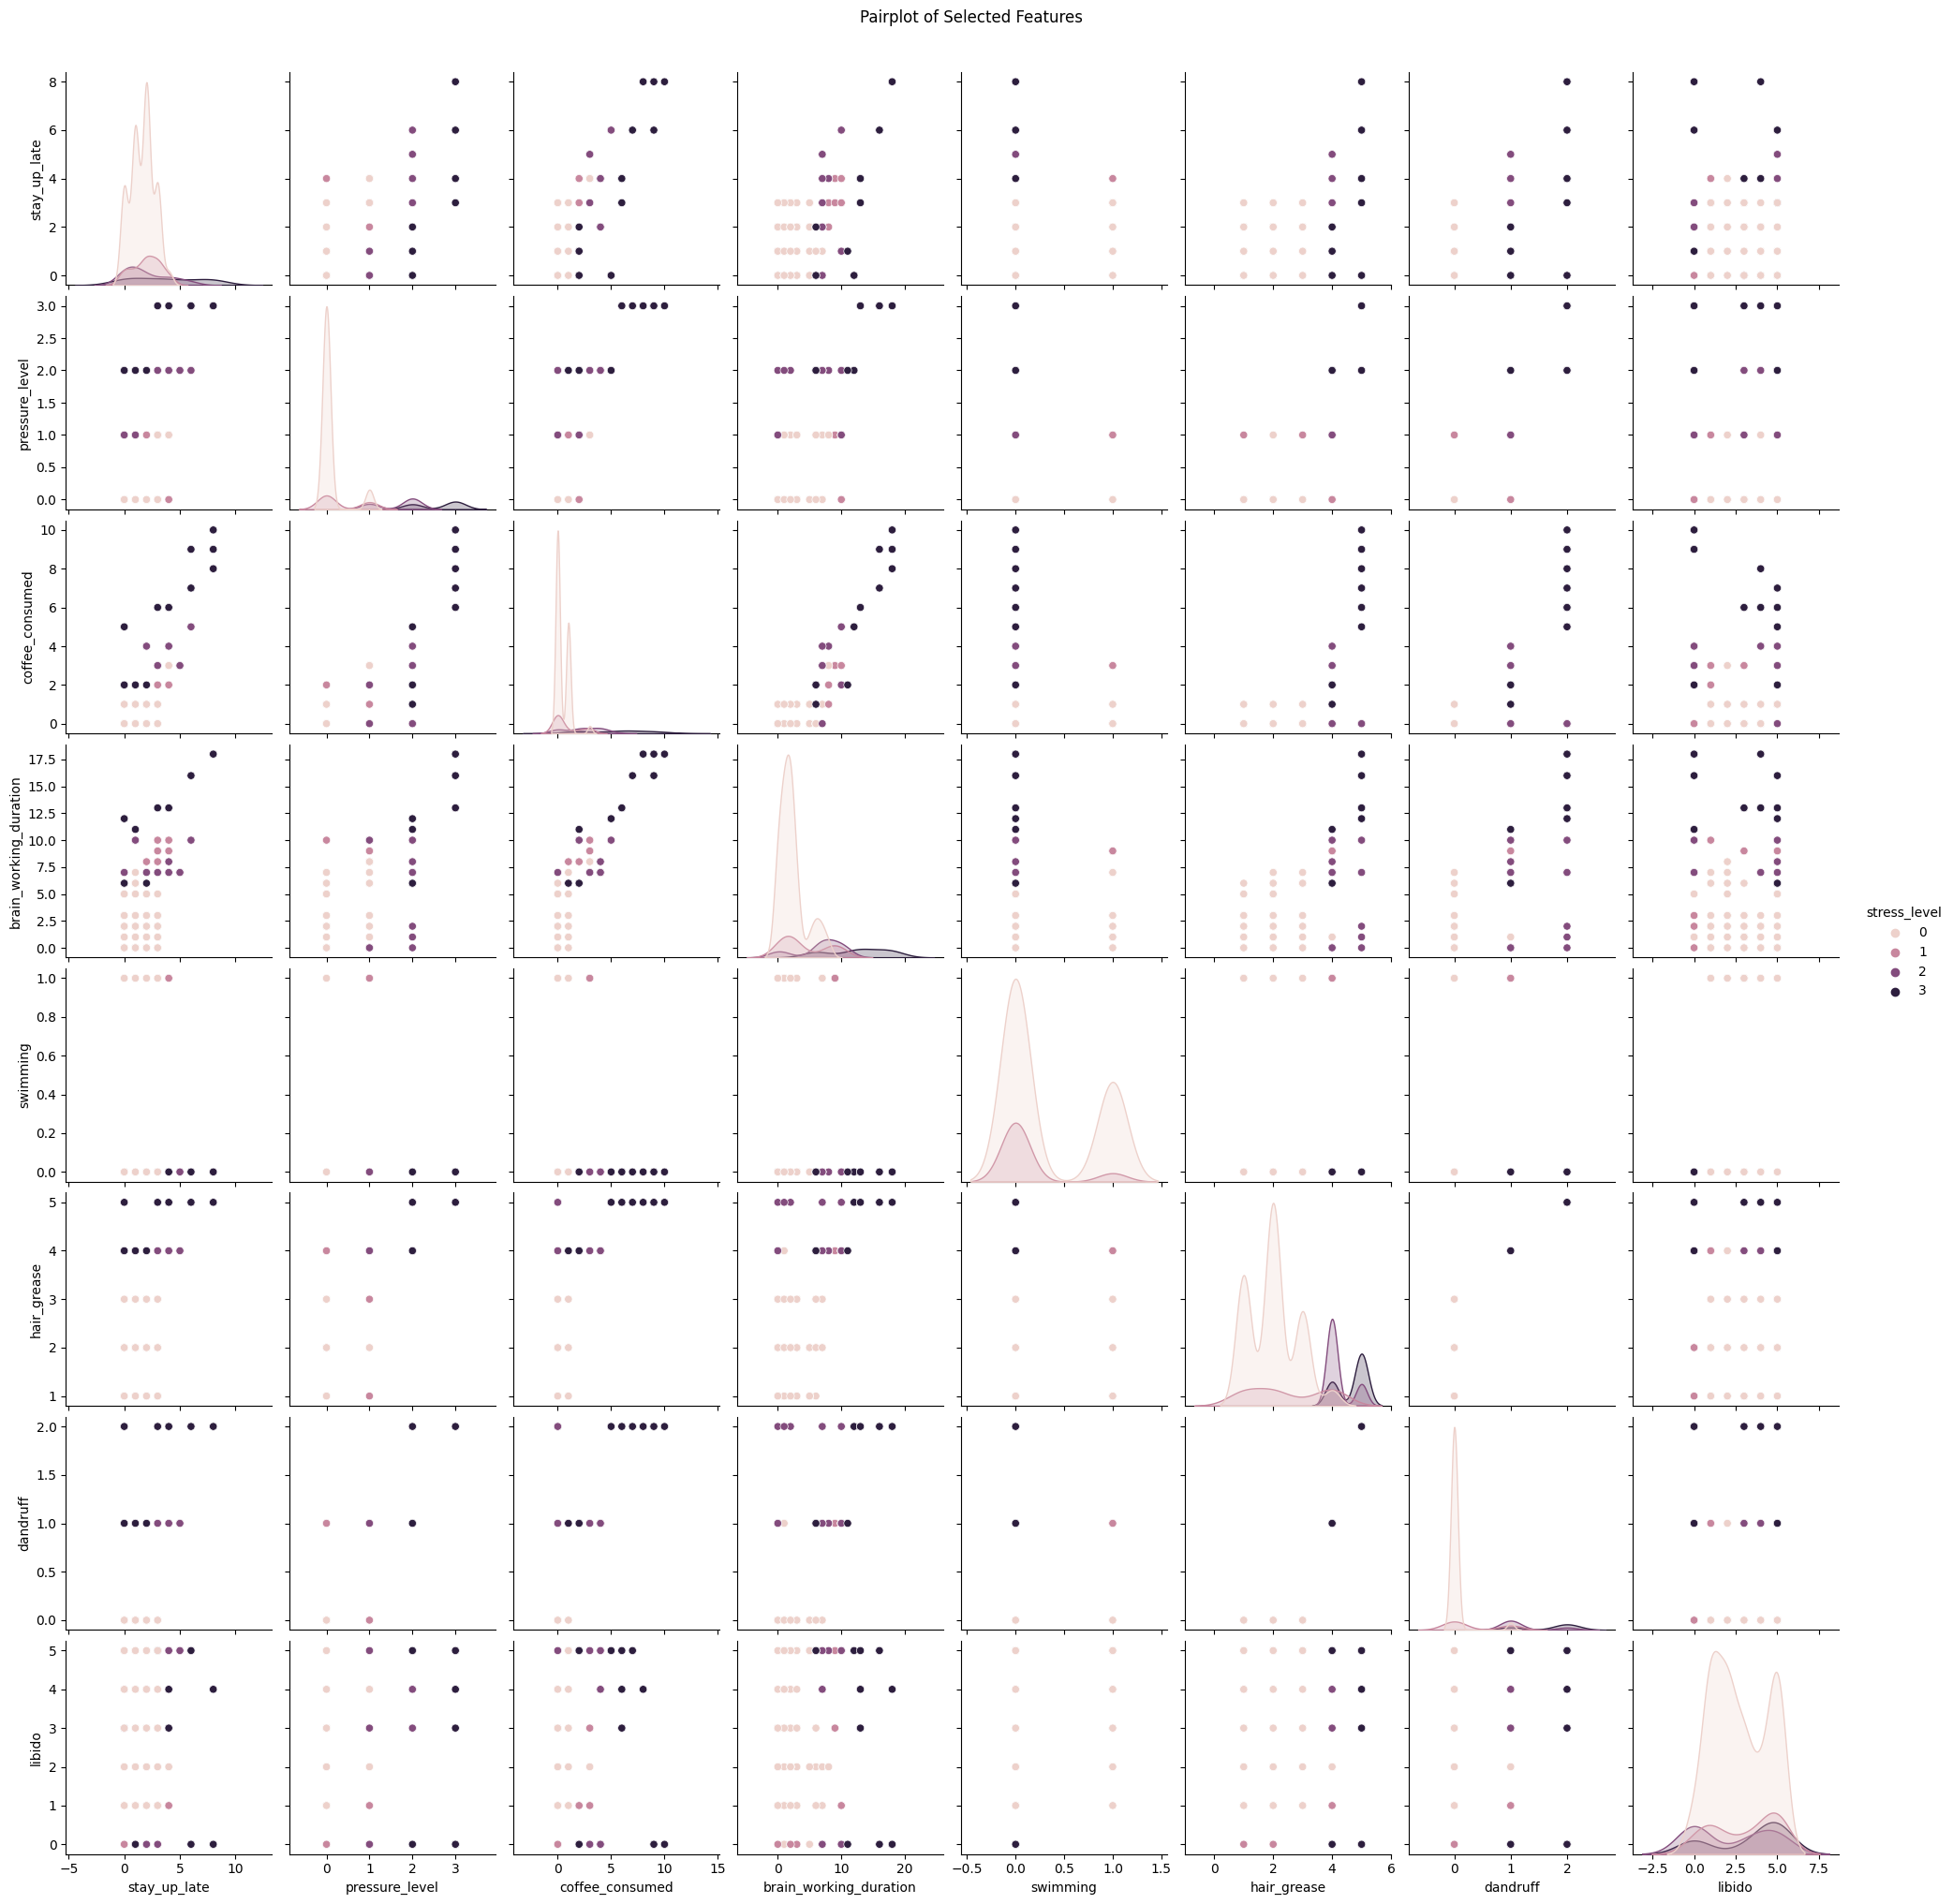

In [39]:
sns.pairplot(df, diag_kind='kde', hue='stress_level')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()



Histogram of 'hair_loss' to visualize its distribution.
Histograms of other columns (e.g., 'dandruff', 'stress_level', 'pressure_level') to understand their distributions.
Box Plots:

Box plots for each feature to visualize the quartiles, detect outliers, and compare distributions across different levels of 'hair_loss'.
Pair Plots:

Pair plots (scatterplots with histograms on diagonal) to visualize pairwise relationships between features and 'hair_loss'. This can help identify potential patterns or clusters.
Bar Plots:

Bar plots to compare the mean or median values of each feature for different levels of 'hair_loss'. This can help you understand how each feature varies with 'hair_loss'.
Correlation Heatmap:

A heatmap to visualize the correlation between all pairs of numerical features, including 'hair_loss'. This can help identify strong correlations.

**Train Test Split**

In [11]:


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.05, random_state=42)
print(X_train.shape)
print(X_test.shape)

(380, 3)
(20, 3)


**decision tree**

Mean Squared Error (MSE): 2.79
R-squared (R2): 0.82


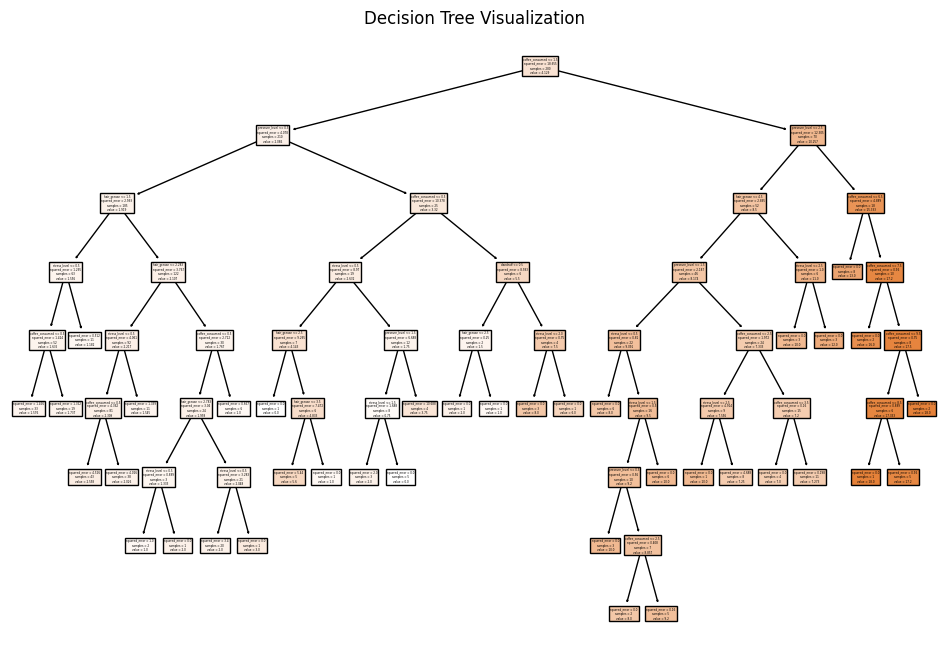

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Added import for handling missing values



# Select the columns of interest
columns_of_interest = ['dandruff', 'stress_level', 'pressure_level', 'hair_grease', 'coffee_consumed',
                        'brain_working_duration']

df = df[columns_of_interest]

# Handle missing values with imputation (replace NaN with the mean)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into features (X) and the target variable (y)
X = df.drop('brain_working_duration', axis=1)
y = df['brain_working_duration']

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Regressor model
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize the Decision Tree (optional)
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(decision_tree, filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization")
plt.show()


To evaluate the Decision Tree Regressor model and calculate its accuracy, you can use the Mean Squared Error (MSE) and R-squared (R2) as metrics. In regression tasks, accuracy is typically not used; instead, you measure how well the model predicts continuous numeric values.


ACCURACY:0.82

In [79]:
column_to_drop = 'date'
if column_to_drop in df.columns:
    df = df.drop(date, axis=1)

**Random forest**

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and the column to predict
features = ['dandruff', 'stress_level', 'pressure_level', 'hair_grease', 'coffee_consumed',
            'brain_working_duration', ]
target = 'pressure_level'  # Replace 'hair_loss' with the column you want to predict

X = df[features]
y = df[target]

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


 this code, we create a Random Forest Regressor model with 50 trees (n_estimators=100) and train it on the entire dataset. Keep in mind that Random Forest models are typically not trained for a specific number of epochs as neural networks are, and you don't need to iterate over epochs. The training process in Random Forest involves constructing multiple decision trees, and the number of trees controls the complexity and performance of the model. Section

Model Building

In [12]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(3)))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['acc'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Training**

In [13]:
model.fit(X_train, y_train,epochs=50,batch_size=64,validation_split=0.10, verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 - 1s - loss: 0.6976 - acc: 0.7222 - val_loss: 0.6870 - val_acc: 0.8421 - 1s/epoch - 238ms/step
Epoch 2/50
6/6 - 0s - loss: 0.6811 - acc: 0.8918 - val_loss: 0.6749 - val_acc: 0.8947 - 43ms/epoch - 7ms/step
Epoch 3/50
6/6 - 0s - loss: 0.6728 - acc: 0.9064 - val_loss: 0.6644 - val_acc: 0.8947 - 53ms/epoch - 9ms/step
Epoch 4/50
6/6 - 0s - loss: 0.6627 - acc: 0.9064 - val_loss: 0.6523 - val_acc: 0.8947 - 44ms/epoch - 7ms/step
Epoch 5/50
6/6 - 0s - loss: 0.6515 - acc: 0.9064 - val_loss: 0.6380 - val_acc: 0.8947 - 42ms/epoch - 7ms/step
Epoch 6/50
6/6 - 0s - loss: 0.6377 - acc: 0.9064 - val_loss: 0.6216 - val_acc: 0.8947 - 62ms/epoch - 10ms/step
Epoch 7/50
6/6 - 0s - loss: 0.6213 - acc: 0.9064 - val_loss: 0.6041 - val_acc: 0.8947 - 63ms/epoch - 11ms/step
Epoch 8/50
6/6 - 0s - loss: 0.6014 - acc: 0.9064 - val_loss: 0.5837 - val_acc: 0.8947 - 43ms/epoch - 7ms/step
Epoch 9/50
6/6 - 0s - loss: 0.5776 - acc: 0.8977 - val_loss: 0.5567 - val_acc: 0.8947 - 46ms/epoch - 8ms/step
Epoch 10/50
6/6 - 0

**Evaluating**

In [14]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.1242 - acc: 0.9500


[0.12420953810214996, 0.949999988079071]

**Result: He was hair loss**

In [15]:
model.predict(np.array([[2,2,2]]))

1/1 [==============================] - 0s 119ms/step


array([[0.9831832]], dtype=float32)

1 you have a model with binary classification output (possibly using a sigmoid activation function) where the predicted outcome is either "hair loss" or "not hair loss." In this case, here's how to interpret the evaluation results:

Loss Value (0.1242): The loss value represents how well or poorly the model's predictions match the actual target values. A lower loss indicates a better fit of the model to the data.

Accuracy (0.9500): The accuracy is the ratio of correct predictions to the total number of predictions. In this case, an accuracy of 0.95 (95%) suggests that the model correctly predicted "hair loss" or "not hair loss" for 95% of the test samples.

Based on these results:

The model has a relatively low loss value (0.1242), indicating that it's making good predictions.

The model has a high accuracy of 95%, suggesting that it correctly classified whether the individual has hair loss or not for a significant portion of the test data.

Given the high accuracy, it's likely that the model was able to identify cases of hair loss correctly for many samples in the test data.

Keep in mind that a more comprehensive evaluation may involve examining additional metrics such as precision, recall, F1-score, and the confusion matrix, depending on the specific goals and requirements of your classification problem. These metrics provide a more detailed understanding of the model's performance, especially in cases where there may be class imbalances or different types of errors to consider.





